In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cols = ['text','sentiment']

In [7]:
yelp = pd.read_table("/Users/jie/desktop/BAYES/Final Project/sentiment labelled sentences/yelp_labelled.txt",header = None,names=cols)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [9]:
yelp.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
yelp.text

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
8                              The fries were great too.
9                                         A great touch.
10                              Service was very prompt.
11                                    Would not go back.
12     The cashier had no care what so ever on what I...
13     I tried the Cape Cod ravoli, chicken,with cran...
14     I was disgusted because I was pretty sure that...
15     I was shocked because no signs indicate cash o...
16                                   Highly recommended.
17                Waitress was 

In [13]:
yelp_pos = yelp[yelp.sentiment==1].text
yelp_pos

0                               Wow... Loved this place.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
8                              The fries were great too.
9                                         A great touch.
10                              Service was very prompt.
13     I tried the Cape Cod ravoli, chicken,with cran...
16                                   Highly recommended.
21                                    The food, amazing.
22                                 Service is also cute.
23     I could care less... The interior is just beau...
24                                    So they performed.
25     That's right....the red velvet cake.....ohhh t...
27     This hole in the wall has great Mexican street...
30     Also there are combos like a burger, fries, an...
32     I found this place by accident and I could not...
34                     Overall, I like this place a lot.
35     The only redeeming quali

In [124]:
yelp_neg = yelp[yelp.sentiment==0].text
yelp_neg

1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
11                                    Would not go back.
12     The cashier had no care what so ever on what I...
14     I was disgusted because I was pretty sure that...
15     I was shocked because no signs indicate cash o...
17                Waitress was a little slow in service.
18     This place is not worth your time, let alone V...
19                                  did not like at all.
20                                   The Burrittos Blah!
26            - They never brought a salad we asked for.
28     Took an hour to get our food only 4 tables in ...
29                     The worst was the salmon sashimi.
31                         This was like the final blow!
33     seems like a good quick 

In [12]:
pip install gensim

    100% |████████████████████████████████| 24.7MB 1.8MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 19.8MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 23.4MB/s ta 0:00:01
    100% |████████████████████████████████| 5.3MB 4.6MB/s eta 0:00:01  1% |▋                               | 102kB 23.4MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 16.2MB/s ta 0:00:01
  Stored in directory: /Users/jie/Library/Caches/pip/wheels/5f/ea/fb/5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [14]:
import gensim
import nltk
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/jie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [17]:
processed_docs = []

for doc in yelp_pos:
    processed_docs.append(preprocess(doc))

In [18]:
print(processed_docs)

[['love', 'place'], ['stop', 'late', 'bank', 'holiday', 'rick', 'steve', 'recommend', 'love'], ['select', 'menu', 'great', 'price'], ['fri', 'great'], ['great', 'touch'], ['servic', 'prompt'], ['tri', 'cape', 'ravoli', 'chicken', 'cranberri', 'mmmm'], ['high', 'recommend'], ['food', 'amaz'], ['servic', 'cute'], ['care', 'interior', 'beauti'], ['perform'], ['right', 'velvet', 'cake', 'ohhh', 'stuff', 'good'], ['hole', 'wall', 'great', 'mexican', 'street', 'taco', 'friend', 'staff'], ['combo', 'like', 'burger', 'fri', 'beer', 'decent', 'deal'], ['place', 'accid', 'happier'], ['overal', 'like', 'place'], ['redeem', 'qualiti', 'restaur', 'inexpens'], ['ampl', 'portion', 'good', 'price'], ['visit', 'hiro', 'delight'], ['shrimp', 'tender', 'moist'], ['posit', 'note', 'server', 'attent', 'provid', 'great', 'servic'], ['thing', 'like', 'prime', 'dessert', 'section'], ['burger', 'good', 'beef', 'cook', 'right'], ['want', 'sandwich', 'firehous'], ['greek', 'salad', 'greek', 'dress', 'tasti', 'pi

In [19]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [21]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 50:
        break

0 love
1 place
2 bank
3 holiday
4 late
5 recommend
6 rick
7 steve
8 stop
9 great
10 menu
11 price
12 select
13 fri
14 touch
15 prompt
16 servic
17 cape
18 chicken
19 cranberri
20 mmmm
21 ravoli
22 tri
23 high
24 amaz
25 food
26 cute
27 beauti
28 care
29 interior
30 perform
31 cake
32 good
33 ohhh
34 right
35 stuff
36 velvet
37 friend
38 hole
39 mexican
40 staff
41 street
42 taco
43 wall
44 beer
45 burger
46 combo
47 deal
48 decent
49 like
50 accid


In [27]:
'''
OPTIONAL STEP
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''

dictionary.filter_extremes(no_below=10, no_above=0.1, keep_n= 100000)

In [28]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [29]:
document_num = 100
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 8 ("come") appears 1 time.


In [30]:
# LDA mono-core -- fallback code in case LdaMulticore throws an error on your machine
# lda_model = gensim.models.LdaModel(bow_corpus, 
#                                    num_topics = 10, 
#                                    id2word = dictionary,                                    
#                                    passes = 50)

# LDA multicore 
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# TODO
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [31]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.485*"amaz" + 0.480*"nice" + 0.004*"time" + 0.003*"come" + 0.003*"like" + 0.003*"perfect" + 0.003*"price" + 0.003*"servic" + 0.003*"restaur" + 0.003*"love"


Topic: 1 
Words: 0.613*"love" + 0.349*"restaur" + 0.006*"nice" + 0.004*"like" + 0.003*"friend" + 0.003*"time" + 0.003*"servic" + 0.003*"best" + 0.003*"come" + 0.003*"delici"


Topic: 2 
Words: 0.892*"servic" + 0.071*"price" + 0.004*"delici" + 0.003*"love" + 0.003*"friend" + 0.003*"nice" + 0.003*"restaur" + 0.003*"perfect" + 0.003*"like" + 0.003*"vega"


Topic: 3 
Words: 0.740*"friend" + 0.216*"servic" + 0.006*"perfect" + 0.004*"vega" + 0.004*"price" + 0.004*"nice" + 0.003*"love" + 0.003*"best" + 0.003*"delici" + 0.003*"time"


Topic: 4 
Words: 0.609*"time" + 0.352*"vega" + 0.004*"nice" + 0.004*"friend" + 0.003*"best" + 0.003*"come" + 0.003*"delici" + 0.003*"restaur" + 0.003*"like" + 0.003*"price"


Topic: 5 
Words: 0.519*"come" + 0.431*"perfect" + 0.007*"servic" + 0.005*"vega" + 0.005*"time" + 0.004*"friend" + 0.

Method 2

In [36]:
from gensim.models import Phrases

In [39]:
bigram_model = Phrases(processed_docs)
trigram_model = Phrases(bigram_model[processed_docs], min_count=1)
tokens = list(trigram_model[bigram_model[processed_docs]])

In [40]:
from gensim import corpora

In [41]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [42]:
from gensim import models
import numpy as np

In [152]:
np.random.seed(123456)
num_topics = 10
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 614 ms, sys: 6.92 ms, total: 620 ms
Wall time: 620 ms


In [153]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.118*"delici" + 0.100*"love" + 0.057*"amaz" + 0.039*"fresh" + 0.037*"food" + 0.030*"absolut" + 0.028*"nice" + 0.027*"atmospher" + 0.025*"chef" + 0.024*"visit" + 0.024*"tast" + 0.023*"sandwich" + 0.022*"pork" + 0.021*"great" + 0.017*"meat" + 0.017*"season" + 0.017*"huge" + 0.017*"want" + 0.017*"chicken" + 0.017*"pita"

1: 0.092*"great" + 0.077*"good" + 0.046*"time" + 0.043*"menu" + 0.039*"pizza" + 0.032*"server" + 0.029*"amaz" + 0.029*"definit" + 0.028*"come" + 0.027*"select" + 0.025*"love" + 0.024*"check" + 0.023*"fri" + 0.020*"waitress" + 0.019*"food" + 0.019*"sweet_potato" + 0.019*"wait" + 0.019*"know" + 0.019*"perfect" + 0.015*"place"

2: 0.263*"good" + 0.045*"servic" + 0.037*"price" + 0.037*"food" + 0.033*"bacon" + 0.030*"bread" + 0.029*"serv" + 0.022*"order" + 0.022*"menu" + 0.022*"right" + 0.022*"pretti" + 0.021*"stuff" + 0.020*"come" + 0.020*"chip" + 0.019*"spici" + 0.015*"special" + 0.015*"burger" + 0.015*"better" + 0.015*"treat" + 0.015*"butter"

3: 0.069*"great" + 0.058*"

In [125]:
processed_docs_neg = []

for doc in yelp_neg:
    processed_docs_neg.append(preprocess(doc))

In [138]:
print(processed_docs_neg)

[['crust', 'good'], ['tasti', 'textur', 'nasti'], ['get', 'angri', 'want', 'damn'], ['honeslti', 'tast', 'fresh'], ['potato', 'like', 'rubber', 'tell', 'ahead', 'time', 'keep', 'warmer'], [], ['cashier', 'care', 'end', 'wayyy', 'overpric'], ['disgust', 'pretti', 'sure', 'human', 'hair'], ['shock', 'sign', 'indic', 'cash'], ['waitress', 'littl', 'slow', 'servic'], ['place', 'worth', 'time', 'vega'], ['like'], ['burritto', 'blah'], ['bring', 'salad', 'ask'], ['take', 'hour', 'food', 'tabl', 'restaur', 'food', 'luke', 'warm', 'sever', 'run', 'like', 'total', 'overwhelm'], ['worst', 'salmon', 'sashimi'], ['like', 'final', 'blow'], ['like', 'good', 'quick', 'place', 'grab', 'bite', 'familiar', 'food', 'favor', 'look'], ['poor', 'servic', 'waiter', 'feel', 'like', 'stupid', 'time', 'come', 'tabl'], ['servic', 'suck'], ['deal', 'good', 'drag', 'establish'], ['hard', 'judg', 'side', 'good', 'gross', 'melt', 'styrofoam', 'want', 'fear', 'get', 'sick'], ['freez', 'puck', 'disgust', 'worst', 'peo

In [154]:
bigram_model_neg = Phrases(processed_docs_neg)
trigram_model_neg = Phrases(bigram_model_neg[processed_docs_neg], min_count=1)
tokens_neg = list(trigram_model_neg[bigram_model_neg[processed_docs_neg]])
dictionary_LDA_neg = corpora.Dictionary(tokens_neg)
dictionary_LDA_neg.filter_extremes(no_below=3)
corpus_neg = [dictionary_LDA_neg.doc2bow(tok) for tok in tokens_neg]
np.random.seed(123456)
num_topics = 10
%time lda_model_neg = models.LdaModel(corpus_neg, num_topics=num_topics, \
                                  id2word=dictionary_LDA_neg, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA_neg.keys()))


CPU times: user 569 ms, sys: 2.3 ms, total: 572 ms
Wall time: 575 ms


In [155]:
for i,topic in lda_model_neg.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.061*"know" + 0.050*"friend" + 0.046*"dish" + 0.044*"thing" + 0.039*"price" + 0.038*"food" + 0.036*"wasn" + 0.036*"slow" + 0.028*"like" + 0.028*"time" + 0.027*"servic" + 0.027*"restaur" + 0.026*"watch" + 0.025*"tast" + 0.025*"outsid" + 0.025*"place" + 0.023*"waiter" + 0.019*"wast" + 0.019*"tabl" + 0.019*"good"

1: 0.068*"food" + 0.056*"minut" + 0.050*"long" + 0.039*"place" + 0.038*"insult" + 0.035*"wait" + 0.030*"tabl" + 0.030*"dirti" + 0.030*"seat" + 0.030*"establish" + 0.029*"fail" + 0.029*"serious" + 0.029*"recommend_place" + 0.029*"hour" + 0.025*"dinner" + 0.022*"impress" + 0.021*"night" + 0.021*"felt" + 0.021*"owner" + 0.021*"avoid"

2: 0.085*"order" + 0.083*"food" + 0.051*"probabl" + 0.049*"bland" + 0.044*"pretti" + 0.037*"chip" + 0.035*"chicken" + 0.030*"come" + 0.024*"disappoint" + 0.023*"get" + 0.023*"think" + 0.022*"go" + 0.022*"gross" + 0.022*"consid" + 0.022*"mayb" + 0.022*"best" + 0.021*"peopl" + 0.018*"like" + 0.017*"salad" + 0.015*"dish"

3: 0.130*"servic" + 0.057*"t

Gibbs Sampling for LDA

In [131]:
# Z := word topic assignment 
Z = np.zeros(shape=[N_D, N_W])
for i in range(N_D):
    for l in range(N_W):
        Z[i, l] = np.random.randint(N_K) # randomly assign word's top
# Theta := document topic distribution 
Theta = np.zeros([N_D, N_K])
for i in range(N_D):
    Theta[i] = np.random.dirichlet(alpha*np.ones(N_K))
# Phi := word topic distribution 
Phi = np.zeros([N_K, N_W])
for k in range(N_K):
    Phi[k] = np.random.dirichlet(gamma*np.ones(N_W))

In [132]:
def z_update(N_D,N_K,Theta,Phi):
    for i in range(N_D):
        for v in range(N_W):
            p_iv = np.exp(np.log(Theta[i]) + np.log(Phi[:, X[i, v]]))
            p_iv = np.sum(p_iv)
            Z[i, v] = np.random.multinomial(1, p_iv).argmax()
    return  Z[i, v]

In [133]:
def Theta_update(N_D,N_K,alpha):
    for i in range(N_D):
        m = np.zeros(N_K)
    for k in range(N_K):
            m[k] = np.sum(Z[i] == k)
    Theta[i, :] = np.random.dirichlet(alpha + m)
    return Theta[i, :]

In [134]:
def Phi_update(N_K,N_W,N_D):
    for k in range(N_K):
        n = np.zeros(N_W)        
        for v in range(N_W):
            for i in range(N_D):
                for l in range(N_W):
                    n[v] += (X[i, l] == v) and (Z[i, l] == k)

        # Resample word topic dist.         
    Phi[k, :] = np.random.dirichlet(gamma + n)
    return Phi[k, :]

In [135]:
def gibbs(niter, alpha, gamma, N_D,N_W,N_K):
    Z_ = np.random.multinomial(1, p_iv).argmax()
    Theta_ = np.random.dirichlet(alpha + m)
    Phi_ = np.random.dirichlet(gamma + n)


    for i in range(niter):
        Z_ = z_update(N_D,N_K,Theta,Phi)
        Theta_ = Theta_update(N_D,N_K,alpha)
        Phi_ = Phi_update(N_K,N_W,N_D)

        Z[i,v]=z_
        Theta[i,:]=Theta_
        Phi[k, :]= Phi_

    return z_, Theta_, Phi_

In [136]:
alpha =1 
gamma = 1
N_D = 500
N_W = 15
N_K = 20
niter=10000

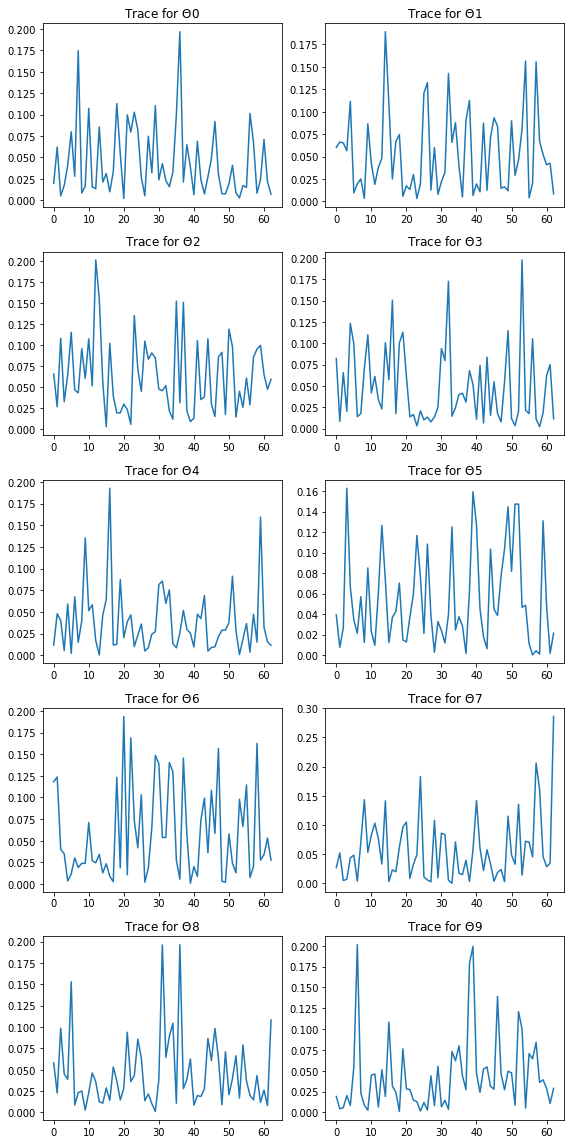

In [137]:
plt.figure(figsize=(8, 16))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.plot(Theta[::8, i]);
    plt.title('Trace for $\Theta$%d' % i)
plt.tight_layout()

In [146]:
pip install pyLDAvis

    100% |████████████████████████████████| 1.6MB 4.7MB/s ta 0:00:011
    100% |████████████████████████████████| 296kB 3.8MB/s ta 0:00:011
  Stored in directory: /Users/jie/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
Note: you may need to restart the kernel to use updated packages.


In [156]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [157]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model_neg, corpus=corpus_neg, dictionary=dictionary_LDA_neg)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
